In [1]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

country_summary = pd.read_csv('countries.csv')
user_summary = pd.read_csv('age_gender_bkts.csv')

Populating the interactive namespace from numpy and matplotlib


# Country Summary Statistics

Lets begin by examining our summary statistic table for the countries of travel.

In [2]:
country_summary

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


We can see below that we are working with 9 different countires, their locations, and some other statitics. With some quick research, we find the definitions of the country and language codes. Lets append these values to our table. 

In [3]:
country_summary['countries'] = ['Australia', 'Canada', 'Germany', 'Spain', 'France', 
                                     'United Kingdom', 'Italy', 'Netherlands', 'Portugal', 'United States']
country_summary['languages'] = ['English', 'English', 'German', 'Spanish', 'French', 
                                'English', 'Italian', 'Dutch', 'Portuguese', 'English']

With a little additional research, the distance_km column indicates the (summary, preasumably mean) distance between the United States and the country in each row. We can see that the distance_km for US is 0. Additionally, there is a column destination_km2, which appears to be distances squared. We can tell by the massive distances, the Earth has a circumference of about 40,000 km for reference. Lets adjust.

In [4]:
country_summary['destination_km'] = np.sqrt(country_summary['destination_km2'])
country_summary

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance,countries,languages,destination_km
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00,Australia,English,2782.304800
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00,Canada,English,3159.852845
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61,Germany,German,597.513180
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25,Spain,Spanish,710.893804
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06,France,French,802.372108
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00,United Kingdom,English,493.568638
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40,Italy,Italian,548.944442
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22,Netherlands,Dutch,203.821000
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45,Portugal,Portuguese,303.463342
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00,United States,English,3134.752781


After adjusting the distances using the numpy sqrt function, we can see that the 'destination_km'apperas to be the distance from the country to the actual AirBnb destinations. This could possibly be used as an approximate statistic for how far travelers have to go after reaching that country. We see that travelers who stay within the US or go to Canada have to travel the further to their destination upon reching the country, while travelers going to the smaller European countries consistently travel less than 1000 km upon reaching the country.

Finally, lets look at the column language_levenshtein_distance. As one might guess, the Levenshtein distance is a metric used to guage the differences in the language by measuring the number of single character edits used to change a word into another. Now while we don't know the exact computation of the Levenshtein distances in the table, we can use it as a quantifiable difference between English and the language of the destination country (assuming that language is not English). We can see that of the non-English speaking destinations, Dutch is the most similar and Portuguese is the most different. 

# User Summary Statistics

Next lets take a look at our user summary statistics. 

In [5]:
len(user_summary)

420

In [6]:
user_summary.sort_values('year').min()
user_summary.sort_values('year').max()

age_bucket                 95-99
country_destination           US
gender                      male
population_in_thousands    11601
year                        2015
dtype: object

In [7]:
user_summary.sort_values('age_bucket').head()

,age_bucket,country_destination,gender,population_in_thousands,year
324,0-4,NL,female,438.0,2015.0
95,0-4,DE,female,1713.0,2015.0
251,0-4,GB,male,1981.0,2015.0
80,0-4,CA,female,991.0,2015.0
274,0-4,IT,male,1468.0,2015.0


In [8]:
user_summary.sort_values('age_bucket').tail()

,age_bucket,country_destination,gender,population_in_thousands,year
317,95-99,NL,male,4.0,2015.0
56,95-99,CA,female,42.0,2015.0
46,95-99,CA,male,13.0,2015.0
106,95-99,DE,male,17.0,2015.0
181,95-99,FR,male,20.0,2015.0


In [9]:
#Check population for France
np.sum(user_summary[user_summary['country_destination']=='FR']['population_in_thousands'])*1000

64983000.0

A quick examination of our user summary statistics reveals that we are working with a wide age group - from infants to the elderly. We have these age buckets split by gender and country destination. We also have the population of visitors, in thousands. There are 21 age buckets with 20 rows in each. 

In [10]:
user_summary['age_bucket'].value_counts().sort_index()

0-4      20
10-14    20
100+     20
15-19    20
20-24    20
25-29    20
30-34    20
35-39    20
40-44    20
45-49    20
5-9      20
50-54    20
55-59    20
60-64    20
65-69    20
70-74    20
75-79    20
80-84    20
85-89    20
90-94    20
95-99    20
Name: age_bucket, dtype: int64

# Main User Data

In [11]:
users = pd.read_csv('train_users_2.csv')
sessions = pd.read_csv('sessions.csv')

Lets take a look at our train data set. We have 213451 entries, with 16 columns. 

In [12]:
len(users.columns),len(users)

(16, 213451)

In [13]:
users.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


We have unique identifier, the date of account creation, and the timestamp of activation. We will need to convert the timestamp into a useable date if we use this column. We also have the date of the first booking, gender, age and signup method. Signup flow is the page a user came to sign up from. We have language, their international language preference. We also have Affiliate data and date about each user's first signup. Finally, we have their first destination country. 

In [14]:
users['age'].value_counts().sort_index().head()

1.0      2
2.0      7
4.0      3
5.0     45
15.0     8
Name: age, dtype: int64

In [15]:
#Lets view the distribution of ages between 13 and 90, assuming these are 'real'
users_age = users[(users['age']>13)&(users['age']<90)]

In [16]:
age = users_age['age']
age = age.dropna(how='all')

## Age Distribution

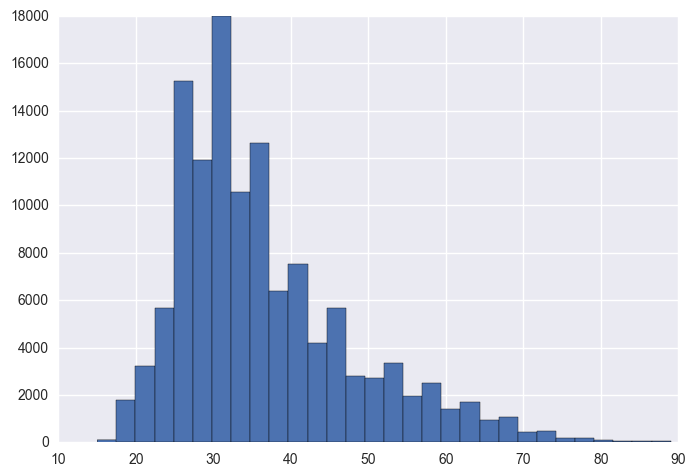

In [86]:
age.hist(bins=30)

Lets take a look at the gender column next. Unfortunately we see that a 44 percentage of the data is unknown. The distribution of user gender over male, female, and other is shown below. 

In [31]:
gender=users['gender']
gender.value_counts() 

-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64

In [30]:
#Percent Unknown
len(gender[gender=='-unknown-'])/len(gender)

0.44829023991454714

## Gender Distribution

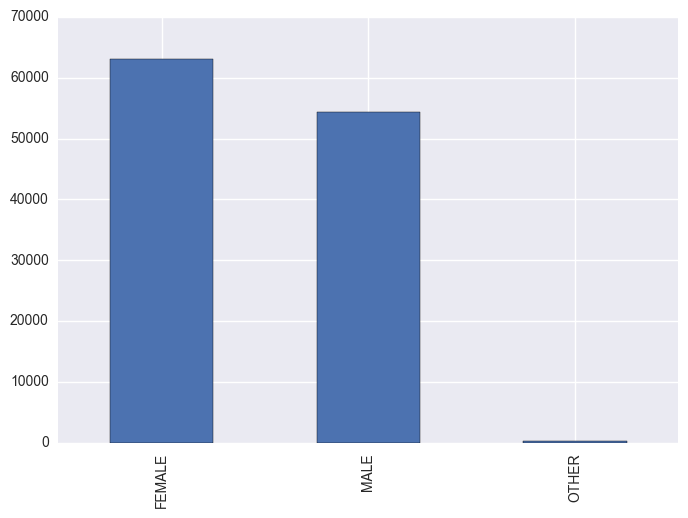

In [49]:
gender_known = gender[gender!='-unknown-']
gender_known = gender_known.dropna(how='all')
gender_known.value_counts().plot(kind='bar')



# Country of destination

In [69]:
dest = users['country_destination'].dropna(how='any')
dest.value_counts('NDF')

NDF      0.583473
US       0.292226
other    0.047290
FR       0.023532
IT       0.013282
GB       0.010888
ES       0.010536
CA       0.006690
DE       0.004971
NL       0.003570
AU       0.002525
PT       0.001017
Name: country_destination, dtype: float64

Interesting. Over half of the user sign ups did not end up booking a destination, and about 41% do. Not surprisingly, most first bookings by Americans occur domestically. Next, lets look at the distribution of actual first bookings (no NDF values or US values).

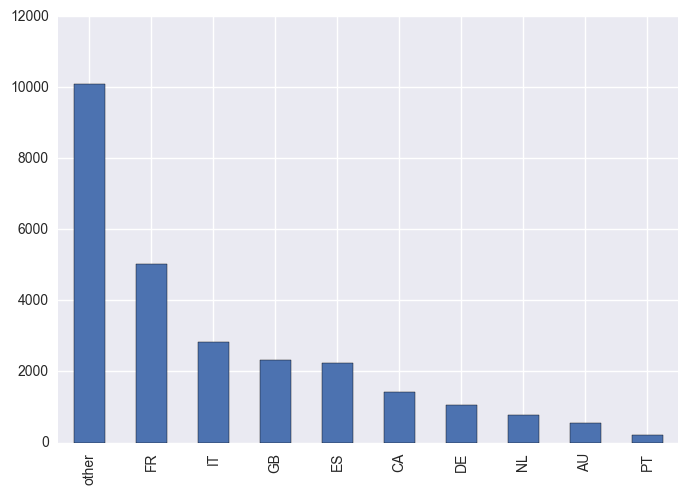

In [80]:
dest_booked = dest[(dest!='NDF')&(dest!='US')]
dest_booked.value_counts().plot(kind='bar')

Lets contrast this with the distribution of the international language preferences.

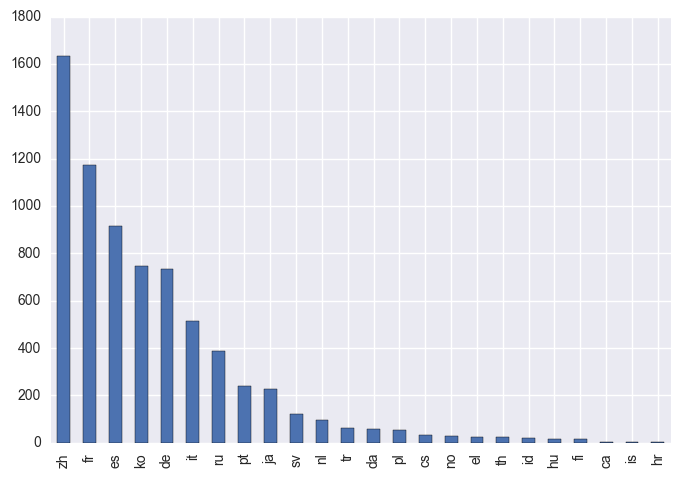

In [79]:
languages = users['language'].dropna(how='any')
languages.value_counts()
languages_foreign = languages[languages!='en']
languages_foreign.value_counts().plot(kind='bar')

Note: Zh is chinese, and Ko is Korean. It appears that the 'Other' bookings would contain several bookings in China or Hong Kong and Korea. 

Lets take a look at the methods of first access. We see that most people accessed AirBnb directly, through a website. It might be interesting to investigate this further by categorizing our data by age groups. 

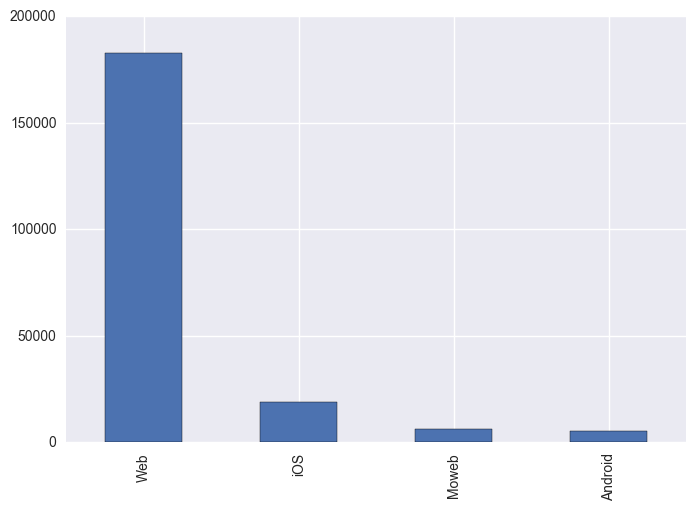

In [89]:
users['signup_app'].value_counts().plot(kind='bar')

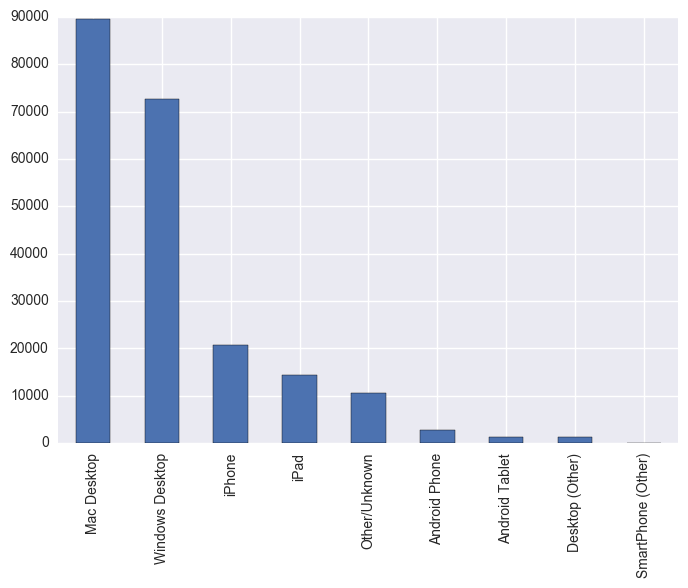

In [90]:
users['first_device_type'].value_counts().plot(kind='bar')

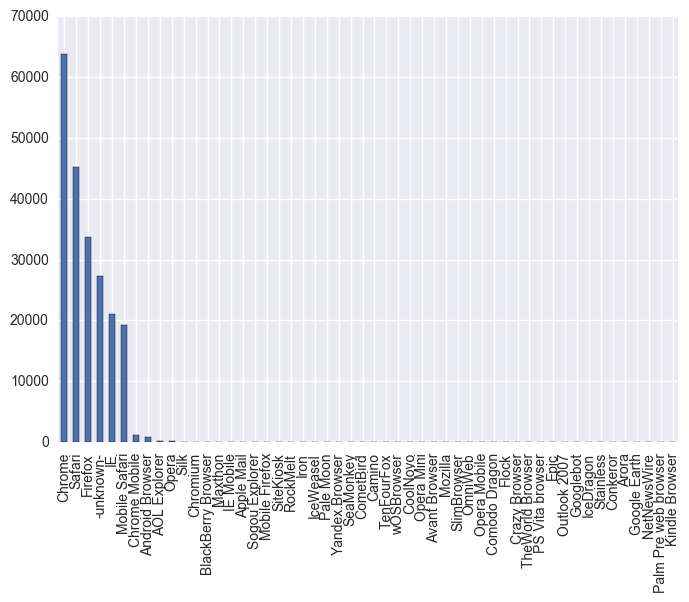

In [91]:
users['first_browser'].value_counts().plot(kind='bar')

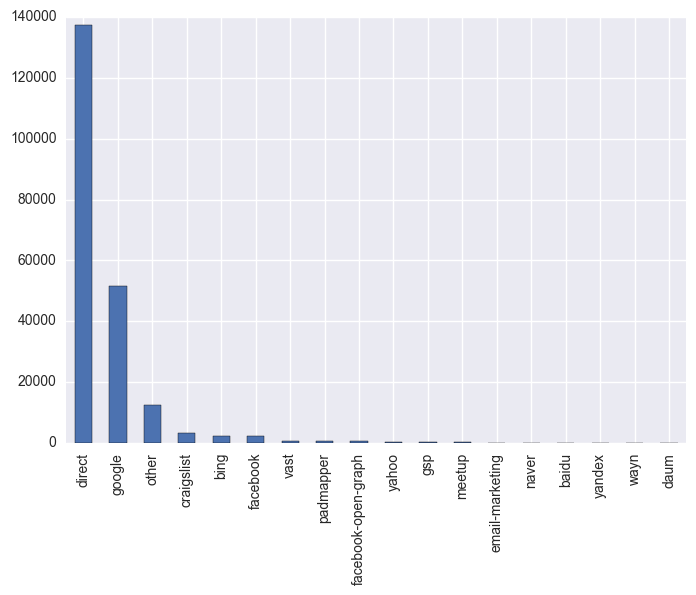

In [92]:
users['affiliate_provider'].value_counts().plot(kind='bar')

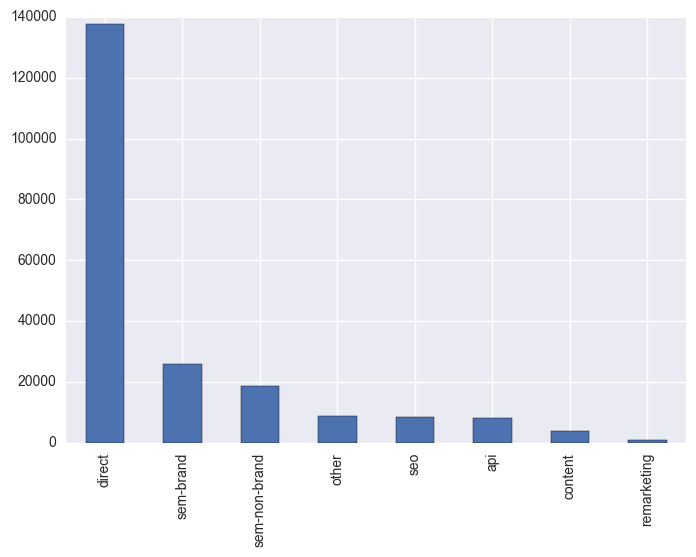

In [93]:
users['affiliate_channel'].value_counts().plot(kind='bar')

## Join tables after cleanup

## Explore NAs, Quantify missing data. Play with imputation.

## Try grouping continuous variables to find groups (age groups, milenial vs generation x, etc.)

## Correlation plot to see which variables are highly correlated

## Heat map for relationships between categorical variables

## Fit a logistic / multi class regression model to the data. 